In [14]:

from langgraph.graph import END
from IPython.display import display, Image
from langgraph.graph import StateGraph

## dummy functions for comprehensive visualization

class PlanExecute:
    pass
def anonymize_queries():
    pass
def plan_step():
    pass
def break_down_plan_step():
    pass

def deanonymize_queries():
    pass
def run_qualitative_retrieval_workflow ():
    pass
def run_qualtative_answer_workflow ():
    pass
def run_task_handler_chain ():
    pass
def replan_step ():
    pass
def run_qualtative_answer_workflow_for_final_answer ():
    pass
def retrieve_or_answer ():
    pass
def can_be_answered ():
    pass

def keep_only_relevant_content ():
    pass

def is_distilled_content_grounded_on_content ():
    pass

def is_answer_grounded_on_context ():
    pass

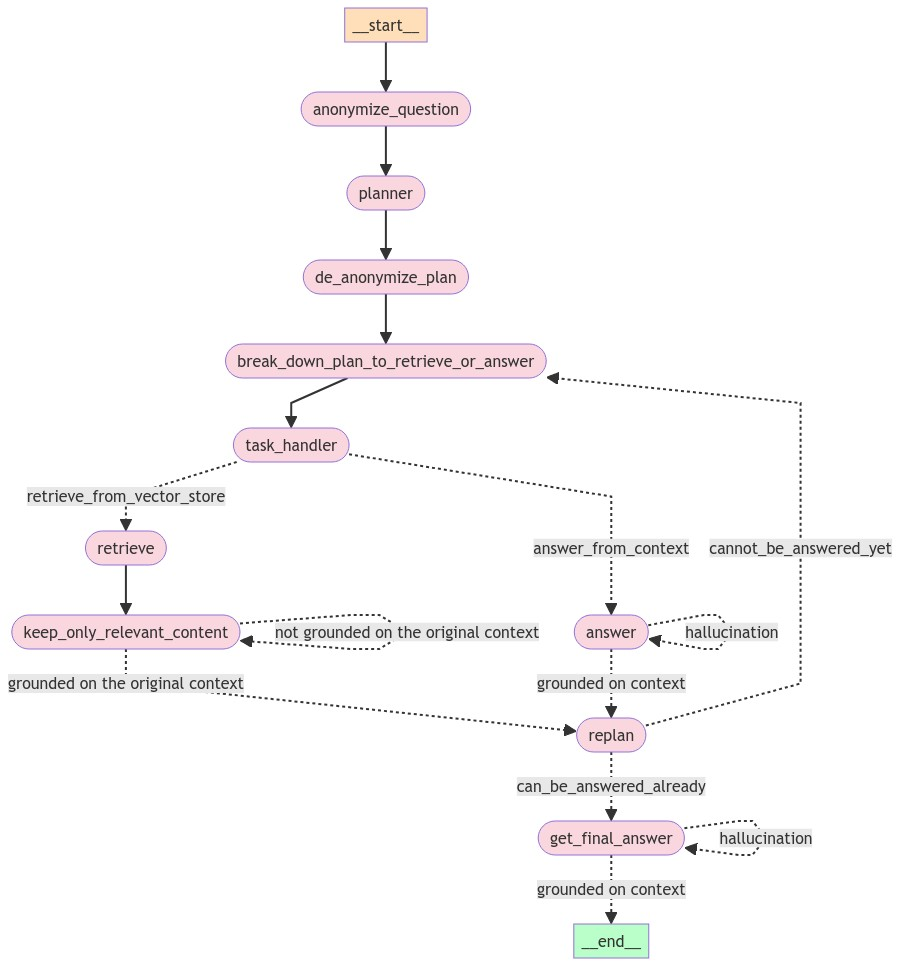

In [16]:

agent_workflow = StateGraph(PlanExecute)

# Add the anonymize node
agent_workflow.add_node("anonymize_question", anonymize_queries)

# Add the plan node
agent_workflow.add_node("planner", plan_step)

# Add the break down plan node

agent_workflow.add_node("break_down_plan_to_retrieve_or_answer", break_down_plan_step)

# Add the deanonymize node
agent_workflow.add_node("de_anonymize_plan", deanonymize_queries)

# Add the qualitative retrieval node
agent_workflow.add_node("retrieve", run_qualitative_retrieval_workflow)

# Add the qualitative answer node
agent_workflow.add_node("answer", run_qualtative_answer_workflow)

# Add the task handler node
agent_workflow.add_node("task_handler", run_task_handler_chain)

# Add a replan node
agent_workflow.add_node("replan", replan_step)

# Add answer from context node
agent_workflow.add_node("get_final_answer", run_qualtative_answer_workflow_for_final_answer)

agent_workflow.add_node("keep_only_relevant_content",keep_only_relevant_content)

# Build the graph


# Set the entry point
agent_workflow.set_entry_point("anonymize_question")

# From anonymize we go to plan
agent_workflow.add_edge("anonymize_question", "planner")

# From plan we go to deanonymize
agent_workflow.add_edge("planner", "de_anonymize_plan")

# From deanonymize we go to break down plan

agent_workflow.add_edge("de_anonymize_plan", "break_down_plan_to_retrieve_or_answer")

# From break_down_plan we go to task handler
agent_workflow.add_edge("break_down_plan_to_retrieve_or_answer", "task_handler")

# From task handler we go to either retrieve or answer
agent_workflow.add_conditional_edges("task_handler", retrieve_or_answer, {"retrieve_from_vector_store": "retrieve", "answer_from_context": "answer"})

# From retrieve we go to keep_only_relevant_content
agent_workflow.add_edge("retrieve", "keep_only_relevant_content")

# distill content
agent_workflow.add_conditional_edges(
    "keep_only_relevant_content",
    is_distilled_content_grounded_on_content,
    {"grounded on the original context":"replan",
      "not grounded on the original context":"keep_only_relevant_content"},
    )

# After answering we go to replan
agent_workflow.add_conditional_edges(
"answer",is_answer_grounded_on_context ,{"hallucination":"answer", "grounded on context":"replan"}

)

# After replanning we check if the question can be answered, if yes we go to get_final_answer, if not we go to task_handler
agent_workflow.add_conditional_edges("replan",can_be_answered, {"can_be_answered_already": "get_final_answer", "cannot_be_answered_yet": "break_down_plan_to_retrieve_or_answer"})


# After getting the final answer we check if the answer is grounded on context, if yes we go to END, if not we go to get_final_answer
agent_workflow.add_conditional_edges(
"get_final_answer",is_answer_grounded_on_context ,{"hallucination":"get_final_answer", "grounded on context":END}

)


plan_and_execute_app = agent_workflow.compile()

display(Image(plan_and_execute_app.get_graph(xray=True).draw_mermaid_png()))